In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [ ]:
# Create dataset with normal and anomalous data points:

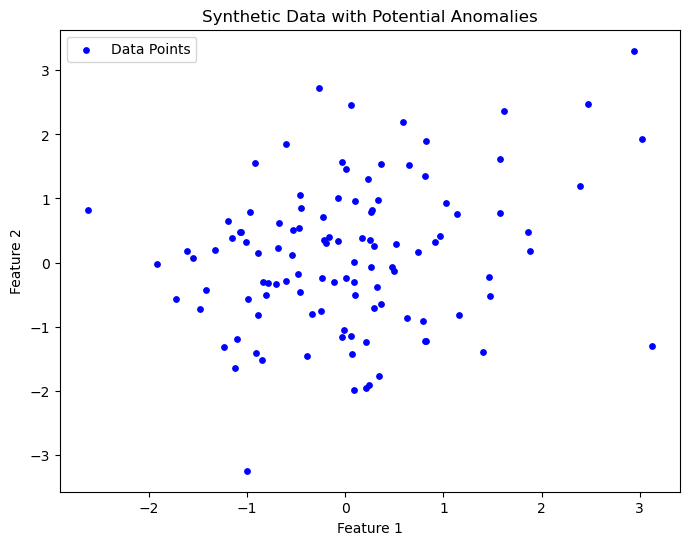

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate normal data
normal_data = np.random.normal(loc=0, scale=1, size=(100, 2))

# Generate anomalous data
anomalies = np.random.uniform(low=-4, high=4, size=(10, 2))

# Combine into one dataset
data = np.vstack([normal_data, anomalies])

# Convert to a pandas DataFrame
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

# Shuffle the data for randomness
df = df.sample(frac=1).reset_index(drop=True)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature1'], df['Feature2'], label="Data Points", c='blue', s=15)
plt.title("Synthetic Data with Potential Anomalies")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [ ]:
# Fit an IsolationForest model to the data to detect anomalies:

In [30]:
# Create and fit the Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination level
df['Anomaly'] = model.fit_predict(df[['Feature1', 'Feature2']])

# Mark anomalies
df['Anomaly'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

In [32]:
# Seperate normal and anomalous points for visualization:

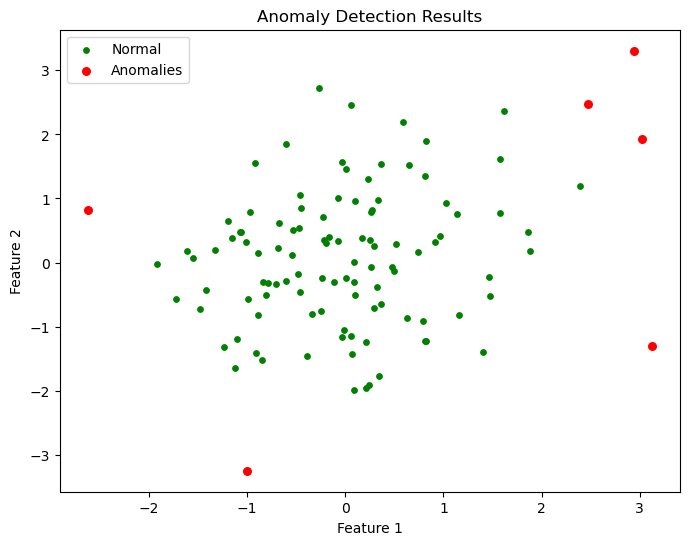

In [34]:
# Separate the data
normal_points = df[df['Anomaly'] == 'Normal']
anomalous_points = df[df['Anomaly'] == 'Anomaly']

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(normal_points['Feature1'], normal_points['Feature2'], label="Normal", c='green', s=15)
plt.scatter(anomalous_points['Feature1'], anomalous_points['Feature2'], label="Anomalies", c='red', s=30)
plt.title("Anomaly Detection Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [36]:
# Save the results to CSV for further analysis:

In [38]:
# Save to a CSV file
df.to_csv("anomaly_detection_results.csv", index=False)

# Display the anomaly count
print("Anomaly Counts:")
print(df['Anomaly'].value_counts())

Anomaly Counts:
Anomaly
Normal     104
Anomaly      6
Name: count, dtype: int64


Expected Output:
A scatterplot showing the data points, with anomalies marked in red.
An output showing the counts of normal and anomalous points.

Key Parameters to Tune:
contamination: Proportion of the dataset that is anomalous (default: 0.1).
n_estimators: Number of trees in the forest (default: 100).
max_samples: Number of samples to draw for training each base estimator.

Extensions:
Real Data: Replace synthetic data with real-world datasets.
Feature Engineering: Add or preprocess features for better anomaly detection.
Advanced Models: Try One-Class SVM, DBSCAN, or deep learning (e.g., autoencoders).